In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [2]:
# Load the data
df = pd.read_csv('../data/train_cleaned.csv')
df.head()


,id,ac,target,s_std_day_year,c_std_day_year,std_day,sta_day,std_month,sta_month,std_time_dec,s_std_time_dec,c_std_time_dec,iso_country_dep,type_dep,iso_country_arr,type_arr,is_same_country
0,train_id_0,TU 32AIMN,260.0,0.051620,0.998667,Sunday,Sunday,January,January,10.5,0.382683,-0.923880,MA,large_airport,TN,large_airport,False
1,train_id_1,TU 31BIMO,20.0,0.221922,0.975065,Wednesday,Wednesday,January,January,15.1,-0.725374,-0.688355,IT,large_airport,TN,large_airport,False
2,train_id_2,TU 32AIMN,0.0,0.271958,0.962309,Saturday,Saturday,January,January,4.2,0.891007,0.453990,TN,large_airport,TR,large_airport,False
3,train_id_3,TU 736IOK,0.0,0.288482,0.957485,Sunday,Sunday,January,January,14.2,-0.544639,-0.838671,TN,medium_airport,FR,medium_airport,False
4,train_id_4,TU 320IMU,22.0,0.288482,0.957485,Sunday,Sunday,January,January,14.5,-0.608761,-0.793353,TN,large_airport,DZ,large_airport,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93679 entries, 0 to 93678
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               93679 non-null  object 
 1   ac               93679 non-null  object 
 2   target           93679 non-null  float64
 3   s_std_day_year   93679 non-null  float64
 4   c_std_day_year   93679 non-null  float64
 5   std_day          93679 non-null  object 
 6   sta_day          93679 non-null  object 
 7   std_month        93679 non-null  object 
 8   sta_month        93679 non-null  object 
 9   std_time_dec     93679 non-null  float64
 10  s_std_time_dec   93679 non-null  float64
 11  c_std_time_dec   93679 non-null  float64
 12  iso_country_dep  93679 non-null  object 
 13  type_dep         93679 non-null  object 
 14  iso_country_arr  93679 non-null  object 
 15  type_arr         93679 non-null  object 
 16  is_same_country  93679 non-null  bool   
dtypes: bool(1), 

### feature target separation

In [4]:
# Split the data into features and target label
X = df.drop(['target', 'id'], axis=1)
y = df['target']

<Axes: >

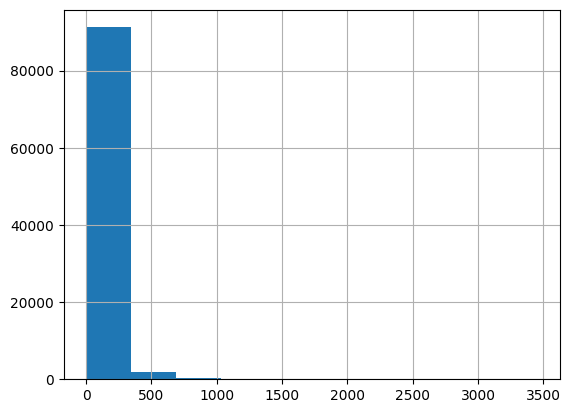

In [5]:
y.hist()

In [6]:
# #one-hot encode features
# X = pd.get_dummies(X)

### train test split

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create log transformation on y_train

In [8]:
# #Log transform the target
# y_train = np.log1p(y_train)

<Axes: >

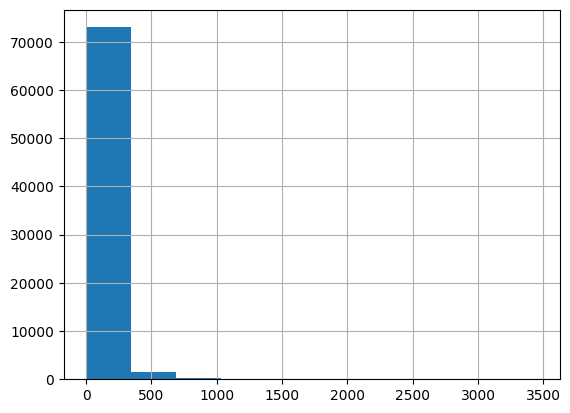

In [9]:
y_train.hist()

### safe data for catboost model (can handle categorical data)

In [10]:
# save X_train, X_test, y_train, y_test in csv files without dummy encoding
X_train.to_csv('../data/X_train_wodum.csv', index=False)
X_test.to_csv('../data/X_test_wodum.csv', index=False)
y_train.to_csv('../data/y_train_wodum.csv', index=False)
y_test.to_csv('../data/y_test_wodum.csv', index=False)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74943 entries, 65956 to 15795
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ac               74943 non-null  object 
 1   s_std_day_year   74943 non-null  float64
 2   c_std_day_year   74943 non-null  float64
 3   std_day          74943 non-null  object 
 4   sta_day          74943 non-null  object 
 5   std_month        74943 non-null  object 
 6   sta_month        74943 non-null  object 
 7   std_time_dec     74943 non-null  float64
 8   s_std_time_dec   74943 non-null  float64
 9   c_std_time_dec   74943 non-null  float64
 10  iso_country_dep  74943 non-null  object 
 11  type_dep         74943 non-null  object 
 12  iso_country_arr  74943 non-null  object 
 13  type_arr         74943 non-null  object 
 14  is_same_country  74943 non-null  bool   
dtypes: bool(1), float64(5), object(9)
memory usage: 8.6+ MB


### use scaler on time

In [12]:
# scaler = StandardScaler()

# # Fit and transform the specified columns
# X_train[['sta_time_dec', 'std_time_dec']] = scaler.fit_transform(X_train[['sta_time_dec', 'std_time_dec']])
# X_test[['sta_time_dec', 'std_time_dec']] = scaler.transform(X_test[['sta_time_dec', 'std_time_dec']])

### make dummie variables (after train test split, as data needed for catboost)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74943 entries, 65956 to 15795
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ac               74943 non-null  object 
 1   s_std_day_year   74943 non-null  float64
 2   c_std_day_year   74943 non-null  float64
 3   std_day          74943 non-null  object 
 4   sta_day          74943 non-null  object 
 5   std_month        74943 non-null  object 
 6   sta_month        74943 non-null  object 
 7   std_time_dec     74943 non-null  float64
 8   s_std_time_dec   74943 non-null  float64
 9   c_std_time_dec   74943 non-null  float64
 10  iso_country_dep  74943 non-null  object 
 11  type_dep         74943 non-null  object 
 12  iso_country_arr  74943 non-null  object 
 13  type_arr         74943 non-null  object 
 14  is_same_country  74943 non-null  bool   
dtypes: bool(1), float64(5), object(9)
memory usage: 8.6+ MB


In [14]:
#make dummie variables

# Define categorical, boolean, and numerical features
categorical_features = [
    'ac', 'std_day', 'sta_day', 'std_month', 'sta_month', 'iso_country_dep', 'iso_country_arr', 'type_dep', 'type_arr'
]
boolean_features = ['is_same_country']
numerical_features = ['s_std_time_dec', 'c_std_time_dec', 's_std_day_year', 'c_std_day_year']  # Add other numerical features here

# Initialize transformers
one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', one_hot, categorical_features),
        ('passthrough', 'passthrough', boolean_features + numerical_features)  
    ])

# Fit and transform data
preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Get the feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Convert X_train_encoded and X_test_encoded to DataFrames
X_train = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test = pd.DataFrame(X_test_encoded, columns=feature_names)

In [15]:
X_train.head()

,one_hot__ac_5K 343TQY,one_hot__ac_5K 345TFX,one_hot__ac_5M 343FOX,one_hot__ac_5M 343JAI,one_hot__ac_5M 343SUN,one_hot__ac_6P M87TRJ,one_hot__ac_BJ 320INA,one_hot__ac_BJ 320INB,one_hot__ac_BJ 320INC,one_hot__ac_BJ 320INH,...,one_hot__type_dep_medium_airport,one_hot__type_dep_small_airport,one_hot__type_arr_large_airport,one_hot__type_arr_medium_airport,one_hot__type_arr_small_airport,passthrough__is_same_country,passthrough__s_std_time_dec,passthrough__c_std_time_dec,passthrough__s_std_day_year,passthrough__c_std_day_year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,False,0.156434,-0.987688,0.746972,0.664855
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,False,-0.99863,0.052336,0.835925,-0.548843
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,False,-0.45399,-0.891007,0.47116,-0.882048
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,False,0.649448,-0.760406,0.46355,0.886071
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,False,0.5,-0.866025,-0.845249,-0.534373


### save the data

In [16]:
# save X_train, X_test, y_train, y_test in csv files
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

## maybe scaling of features, as distribution is skewed

In [17]:
# # Create histograms for every feature in the dataframe
# for column in df.columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[column], kde=True)
#     plt.title(f'Histogram of {column}')
#     plt.show()